In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import re
import json
import warnings
warnings.filterwarnings("ignore")
df = pd.read_csv('/content/Population (1).csv')
df.head()

,FIPStxt,State,Area_Name,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,1000,AL,Alabama,"4,785,437","4,799,069","4,815,588","4,830,081","4,841,799","4,852,347","4,863,525","4,874,486","4,887,681","4,903,185"
1,2000,AK,Alaska,"713,910","722,128","730,443","737,068","736,283","737,498","741,456","739,700","735,139","731,545"
2,4000,AZ,Arizona,"6,407,172","6,472,643","6,554,978","6,632,764","6,730,413","6,829,676","6,941,072","7,044,008","7,158,024","7,278,717"
3,5000,AR,Arkansas,"2,921,964","2,940,667","2,952,164","2,959,400","2,967,392","2,978,048","2,989,918","3,001,345","3,009,733","3,017,804"
4,"6,000.00",CA,California,"37,319,502","37,638,369","37,948,800","38,260,787","38,596,972","38,918,045","39,167,117","39,358,497","39,461,588","39,512,223"


    FIPStxt State   Area_Name        2010        2011        2012        2013  \
0      1000    AL     Alabama   4,785,437   4,799,069   4,815,588   4,830,081   
1      2000    AK      Alaska     713,910     722,128     730,443     737,068   
2      4000    AZ     Arizona   6,407,172   6,472,643   6,554,978   6,632,764   
3      5000    AR    Arkansas   2,921,964   2,940,667   2,952,164   2,959,400   
4  6,000.00    CA  California  37,319,502  37,638,369  37,948,800  38,260,787   

         2014        2015        2016        2017        2018        2019  
0   4,841,799   4,852,347   4,863,525   4,874,486   4,887,681   4,903,185  
1     736,283     737,498     741,456     739,700     735,139     731,545  
2   6,730,413   6,829,676   6,941,072   7,044,008   7,158,024   7,278,717  
3   2,967,392   2,978,048   2,989,918   3,001,345   3,009,733   3,017,804  
4  38,596,972  38,918,045  39,167,117  39,358,497  39,461,588  39,512,223  
Enter the state name for prediction (e.g., Alabama): Alab

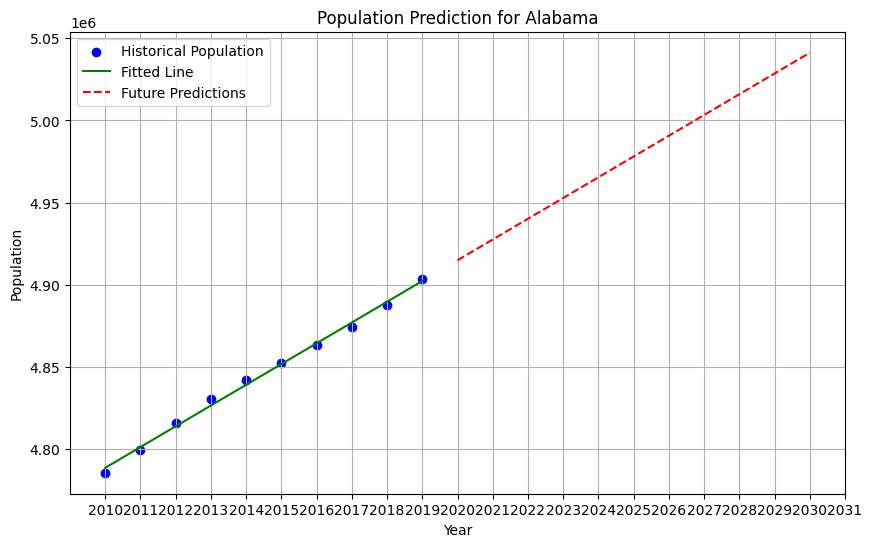

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the dataset from the CSV file
df = pd.read_csv('/content/Population (1).csv')

# Display the first few rows of the DataFrame to verify loading
print(df.head())

# Clean the population data: Remove commas and convert to integers
for year in range(2010, 2020):
    df[str(year)] = df[str(year)].str.replace(',', '').astype(int)

# Prepare the data for the model
# Extract years and population data
years = np.array(range(2010, 2020)).reshape(-1, 1)  # Years as feature

# User input for prediction
user_state = input("Enter the state name for prediction (e.g., Alabama): ")
if user_state in df['Area_Name'].values:
    # Get the population data for the specified state
    populations = df[df['Area_Name'] == user_state].iloc[:, 3:].values.flatten()  # Assuming population data starts from the 4th column

    # Create and train the model
    model = LinearRegression()
    model.fit(years, populations)

    # Predict for any future year
    user_year = int(input("Enter the year for prediction (e.g., 2024): "))
    user_prediction = model.predict(np.array([[user_year]]))
    print(f"The predicted population for {user_state} in {user_year} is: {int(user_prediction[0])}")

    # Plotting the results
    plt.figure(figsize=(10, 6))
    plt.scatter(years, populations, color='blue', label='Historical Population')
    plt.plot(years, model.predict(years), color='green', label='Fitted Line')

    # Plot future predictions
    future_years = np.array(range(2020, 2031)).reshape(-1, 1)
    plt.plot(future_years, model.predict(future_years), color='red', linestyle='dashed', label='Future Predictions')

    plt.title(f'Population Prediction for {user_state}')
    plt.xlabel('Year')
    plt.ylabel('Population')
    plt.xticks(np.arange(2010, 2032, 1))
    plt.legend()
    plt.grid()
    plt.show()
else:
    print("State not found in the dataset.")

Enter the state name for prediction (e.g., Alabama): Alabama
Enter the year for prediction (e.g., 2024): 2025
The predicted population for Alabama in 2025 using Linear Regression is: 4978026
Accuracy Metrics for Linear Regression:
  Mean Absolute Error (MAE): 2016.33
  Mean Squared Error (MSE): 4972675.28
  R-squared (R²): 1.00


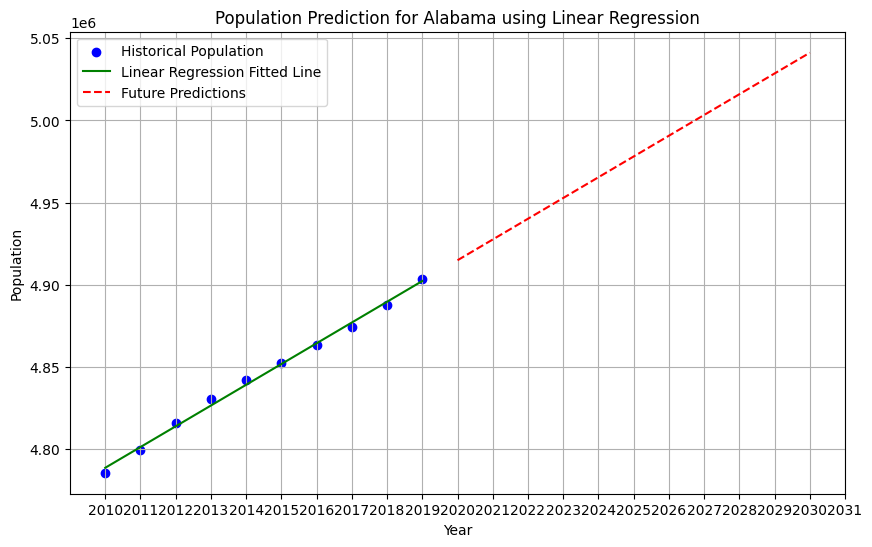

Enter the year for prediction (e.g., 2024): 2025
The predicted population for Alabama in 2025 using Random Forest is: 4896067
Accuracy Metrics for Random Forest:
  Mean Absolute Error (MAE): 3383.27
  Mean Squared Error (MSE): 16943263.72
  R-squared (R²): 0.99


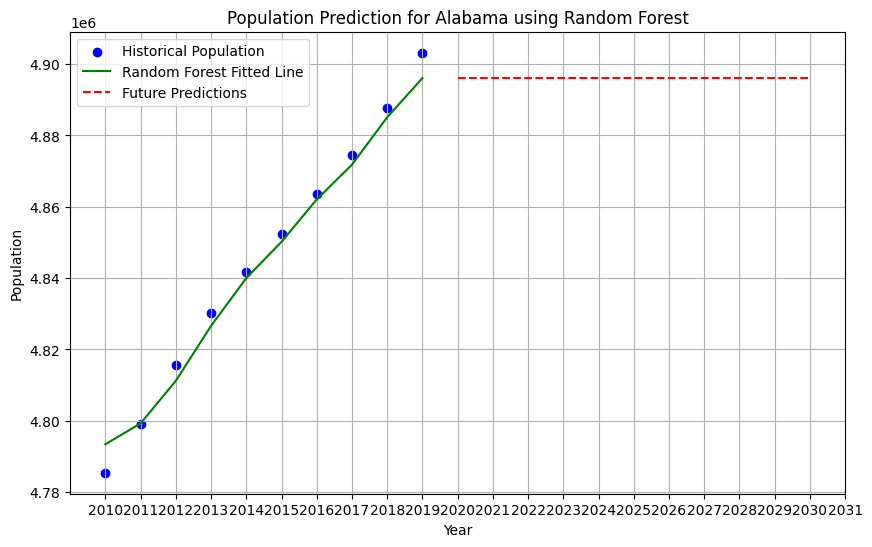

Enter the year for prediction (e.g., 2024): 2025
The predicted population for Alabama in 2025 using Decision Tree is: 4903185
Accuracy Metrics for Decision Tree:
  Mean Absolute Error (MAE): 0.00
  Mean Squared Error (MSE): 0.00
  R-squared (R²): 1.00


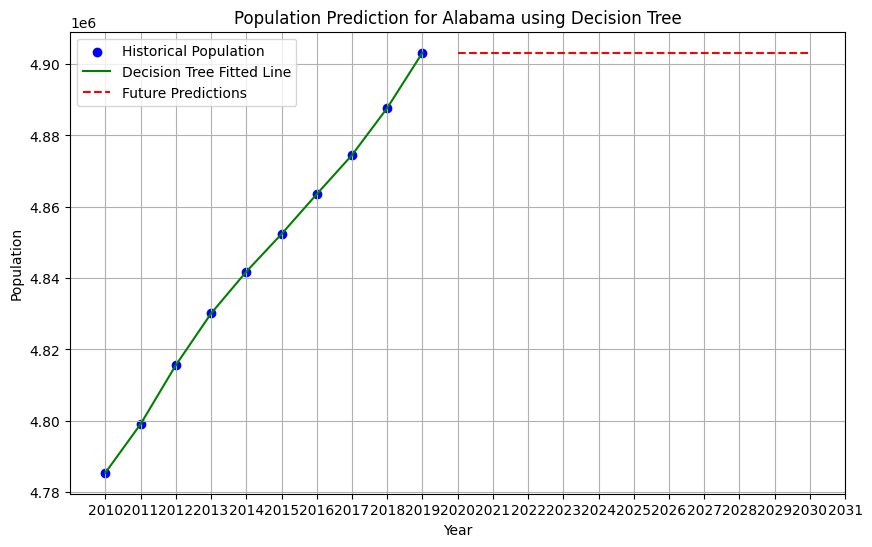

Do you want to make another prediction? (yes/no): yes
Enter the state name for prediction (e.g., Alabama): Texas
Enter the year for prediction (e.g., 2024): 2030
The predicted population for Texas in 2030 using Linear Regression is: 33797507
Accuracy Metrics for Linear Regression:
  Mean Absolute Error (MAE): 49180.45
  Mean Squared Error (MSE): 3573859267.84
  R-squared (R²): 1.00


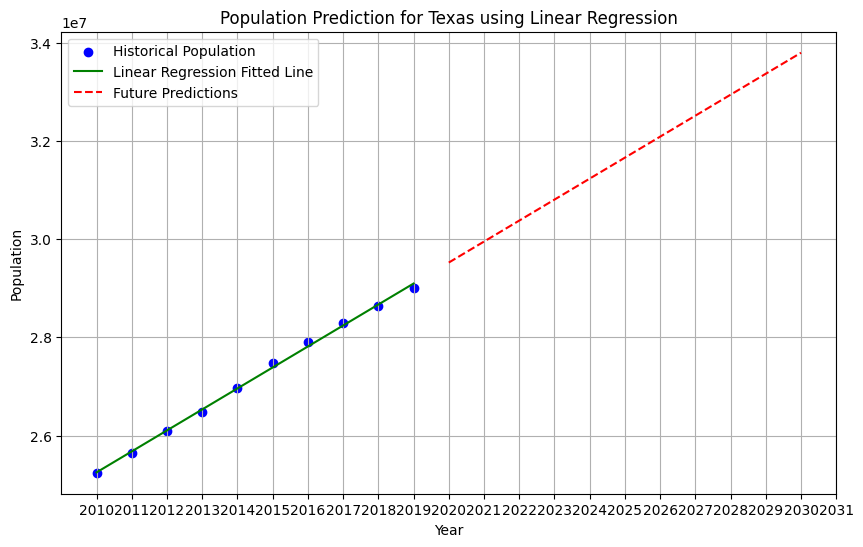

Enter the year for prediction (e.g., 2024): 2030
The predicted population for Texas in 2030 using Random Forest is: 28790395
Accuracy Metrics for Random Forest:
  Mean Absolute Error (MAE): 105670.38
  Mean Squared Error (MSE): 15812321312.48
  R-squared (R²): 0.99


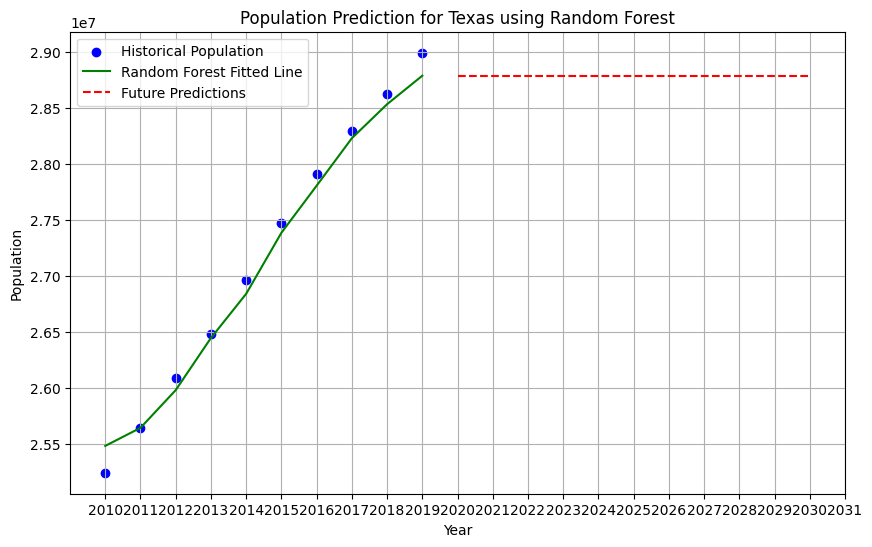

Enter the year for prediction (e.g., 2024): 2030
The predicted population for Texas in 2030 using Decision Tree is: 28995881
Accuracy Metrics for Decision Tree:
  Mean Absolute Error (MAE): 0.00
  Mean Squared Error (MSE): 0.00
  R-squared (R²): 1.00


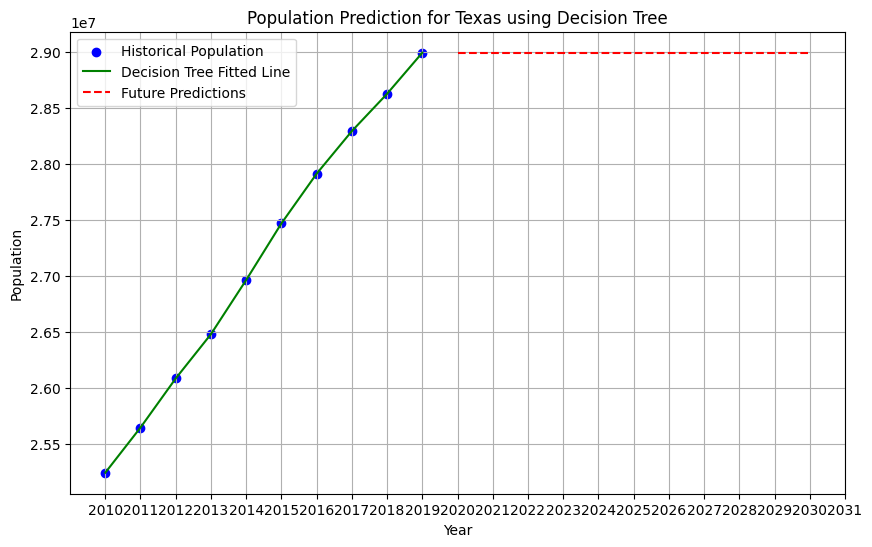

Do you want to make another prediction? (yes/no): no
Thank you for using the population prediction tool!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset from the CSV file
df = pd.read_csv('/content/Population (1).csv')

# Clean the population data: Remove commas and convert to integers
for year in range(2010, 2020):
    df[str(year)] = df[str(year)].str.replace(',', '').astype(int)

# Prepare the data for the model
years = np.array(range(2010, 2020)).reshape(-1, 1)  # Years as feature

while True:
    # User input for prediction
    user_state = input("Enter the state name for prediction (e.g., Alabama): ")

    if user_state in df['Area_Name'].values:
        # Get the population data for the specified state
        populations = df[df['Area_Name'] == user_state].iloc[:, 3:].values.flatten()  # Population data

        # Create and train models
        models = {
            'Linear Regression': LinearRegression(),
            'Random Forest': RandomForestRegressor(n_estimators=100),
            'Decision Tree': DecisionTreeRegressor()
        }

        for model_name, model in models.items():
            model.fit(years, populations)

            # Predict for the training years to calculate accuracy
            predictions = model.predict(years)

            # Calculate accuracy metrics
            mae = mean_absolute_error(populations, predictions)
            mse = mean_squared_error(populations, predictions)
            r2 = r2_score(populations, predictions)

            # Predict for any future year
            user_year = int(input("Enter the year for prediction (e.g., 2024): "))
            user_prediction = model.predict(np.array([[user_year]]))
            print(f"The predicted population for {user_state} in {user_year} using {model_name} is: {int(user_prediction[0])}")
            print(f"Accuracy Metrics for {model_name}:")
            print(f"  Mean Absolute Error (MAE): {mae:.2f}")
            print(f"  Mean Squared Error (MSE): {mse:.2f}")
            print(f"  R-squared (R²): {r2:.2f}")

            # Plotting the results
            plt.figure(figsize=(10, 6))
            plt.scatter(years, populations, color='blue', label='Historical Population')
            plt.plot(years, predictions, color='green', label=f'{model_name} Fitted Line')

            # Plot future predictions
            future_years = np.array(range(2020, 2031)).reshape(-1, 1)
            plt.plot(future_years, model.predict(future_years), color='red', linestyle='dashed', label='Future Predictions')

            plt.title(f'Population Prediction for {user_state} using {model_name}')
            plt.xlabel('Year')
            plt.ylabel('Population')
            plt.xticks(np.arange(2010, 2032, 1))
            plt.legend()
            plt.grid()
            plt.show()
    else:
        print("State not found in the dataset.")

    # Ask user if they want to continue
    continue_prompt = input("Do you want to make another prediction? (yes/no): ").strip().lower()
    if continue_prompt != 'yes':
        print("Thank you for using the population prediction tool!")
        break

Enter the state name for prediction (e.g., Alabama): California
Accuracy Metrics for Linear Regression:
  Mean Absolute Error (MAE): 113046.42
  Mean Squared Error (MSE): 17726551689.31
  R-squared (R²): 0.97
Enter the year for prediction (e.g., 2024): 2029
The predicted population for California in 2029 using Linear Regression is: 42360558


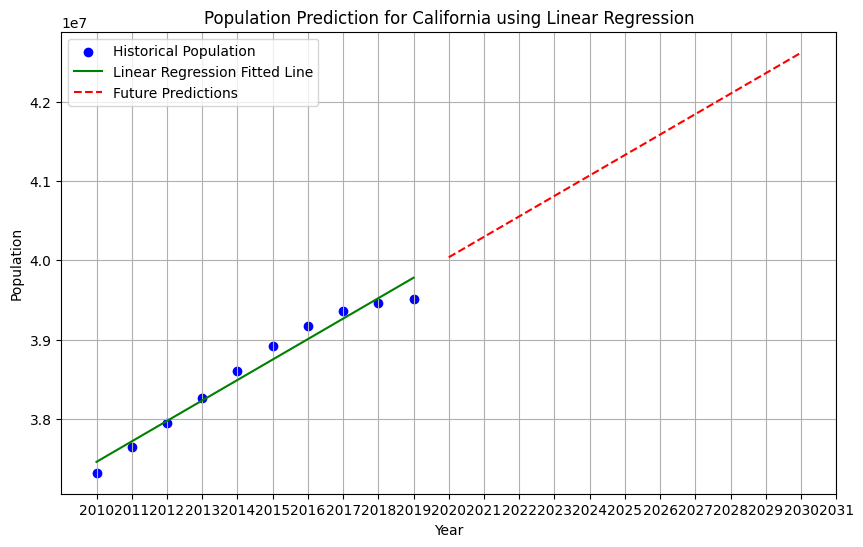

Accuracy Metrics for Random Forest:
  Mean Absolute Error (MAE): 59618.04
  Mean Squared Error (MSE): 4726628130.87
  R-squared (R²): 0.99
Enter the year for prediction (e.g., 2024): 2029
The predicted population for California in 2029 using Random Forest is: 39484074


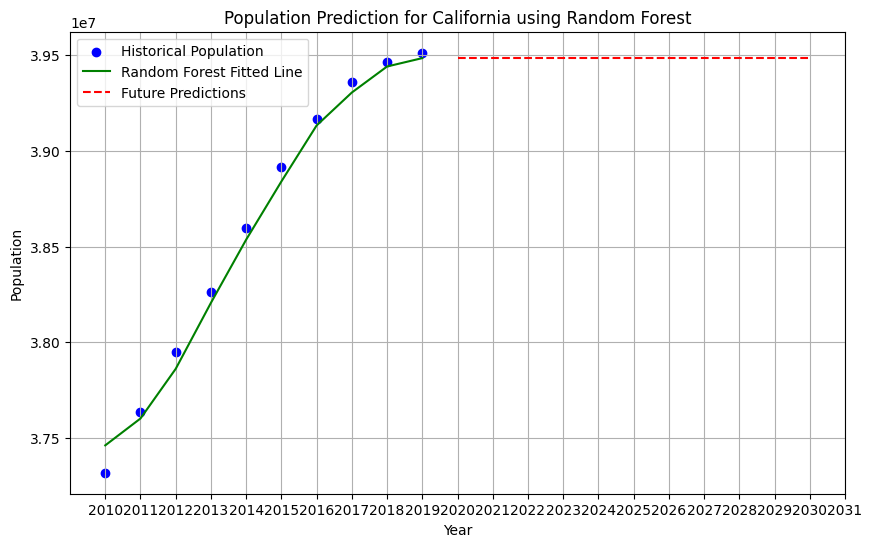

Accuracy Metrics for Decision Tree:
  Mean Absolute Error (MAE): 0.00
  Mean Squared Error (MSE): 0.00
  R-squared (R²): 1.00
Enter the year for prediction (e.g., 2024): 2029
The predicted population for California in 2029 using Decision Tree is: 39512223


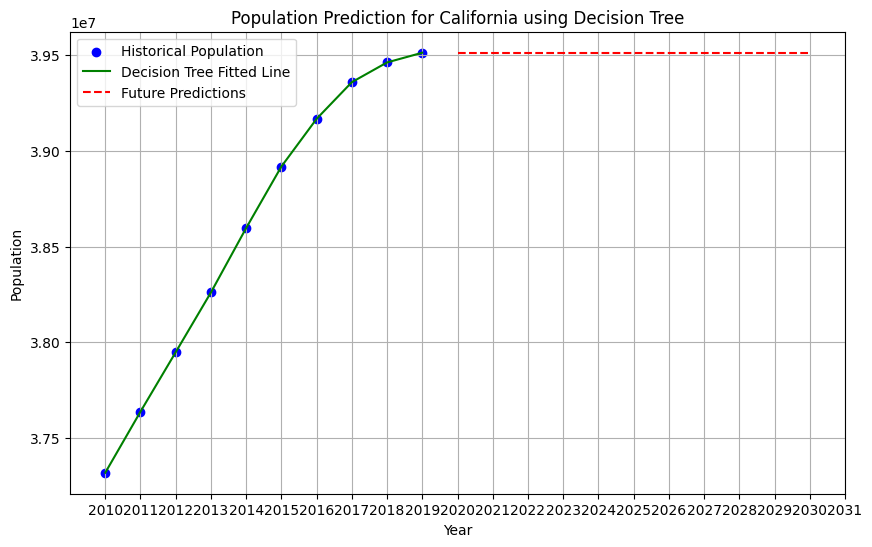

The best model for predicting the population of California is: Decision Tree with R² score: 1.00
Do you want to make another prediction? (yes/no): no
Thank you for using the population prediction tool!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset from the CSV file
df = pd.read_csv('/content/Population (1).csv')

# Clean the population data: Remove commas and convert to integers
for year in range(2010, 2020):
    df[str(year)] = df[str(year)].str.replace(',', '').astype(int)

# Prepare the data for the model
years = np.array(range(2010, 2020)).reshape(-1, 1)  # Years as feature

while True:
    # User input for prediction
    user_state = input("Enter the state name for prediction (e.g., Alabama): ")

    if user_state in df['Area_Name'].values:
        # Get the population data for the specified state
        populations = df[df['Area_Name'] == user_state].iloc[:, 3:].values.flatten()  # Population data

        # Create and train models
        models = {
            'Linear Regression': LinearRegression(),
            'Random Forest': RandomForestRegressor(n_estimators=100),
            'Decision Tree': DecisionTreeRegressor()
        }

        best_model_name = None
        best_r2 = -np.inf  # Initialize best R² score
        best_predictions = None

        for model_name, model in models.items():
            model.fit(years, populations)

            # Predict for the training years to calculate accuracy
            predictions = model.predict(years)

            # Calculate accuracy metrics
            mae = mean_absolute_error(populations, predictions)
            mse = mean_squared_error(populations, predictions)
            r2 = r2_score(populations, predictions)

            # Display accuracy metrics
            print(f"Accuracy Metrics for {model_name}:")
            print(f"  Mean Absolute Error (MAE): {mae:.2f}")
            print(f"  Mean Squared Error (MSE): {mse:.2f}")
            print(f"  R-squared (R²): {r2:.2f}")

            # Check for the best model based on R² score
            if r2 > best_r2:
                best_r2 = r2
                best_model_name = model_name
                best_predictions = predictions

            # Predict for any future year
            user_year = int(input("Enter the year for prediction (e.g., 2024): "))
            user_prediction = model.predict(np.array([[user_year]]))
            print(f"The predicted population for {user_state} in {user_year} using {model_name} is: {int(user_prediction[0])}")

            # Plotting the results
            plt.figure(figsize=(10, 6))
            plt.scatter(years, populations, color='blue', label='Historical Population')
            plt.plot(years, predictions, color='green', label=f'{model_name} Fitted Line')

            # Plot future predictions
            future_years = np.array(range(2020, 2031)).reshape(-1, 1)
            plt.plot(future_years, model.predict(future_years), color='red', linestyle='dashed', label='Future Predictions')

            plt.title(f'Population Prediction for {user_state} using {model_name}')
            plt.xlabel('Year')
            plt.ylabel('Population')
            plt.xticks(np.arange(2010, 2032, 1))
            plt.legend()
            plt.grid()
            plt.show()

        # Display the best model based on R² score
        print(f"The best model for predicting the population of {user_state} is: {best_model_name} with R² score: {best_r2:.2f}")
    else:
        print("State not found in the dataset.")

    # Ask user if they want to continue
    continue_prompt = input("Do you want to make another prediction? (yes/no): ").strip().lower()
    if continue_prompt != 'yes':
        print("Thank you for using the population prediction tool!")
        break

Enter the state name for prediction (e.g., Alabama): Alabama
Accuracy Metrics for Linear Regression:
  Mean Absolute Error (MAE): 1423.92
  Mean Squared Error (MSE): 3238416.91
  R-squared (R²): 1.00
Enter the year for prediction (e.g., 2024): 2026
Enter estimated growth rate (e.g., 0.02 for 2%): 0.02
The predicted population for Alabama in 2026 using Linear Regression is: 5016102


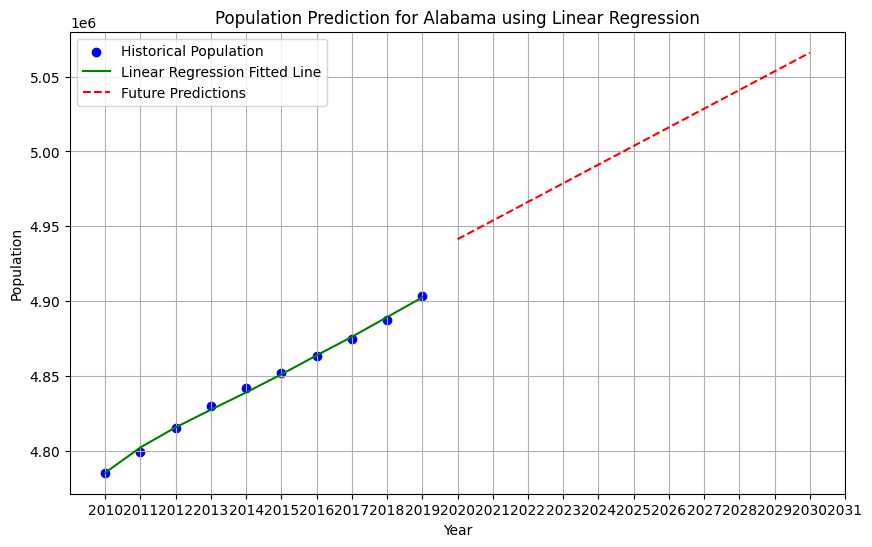

Accuracy Metrics for Random Forest:
  Mean Absolute Error (MAE): 3990.38
  Mean Squared Error (MSE): 22273452.61
  R-squared (R²): 0.98
Enter the year for prediction (e.g., 2024): 2026
Enter estimated growth rate (e.g., 0.02 for 2%): 0.02
The predicted population for Alabama in 2026 using Random Forest is: 4895463


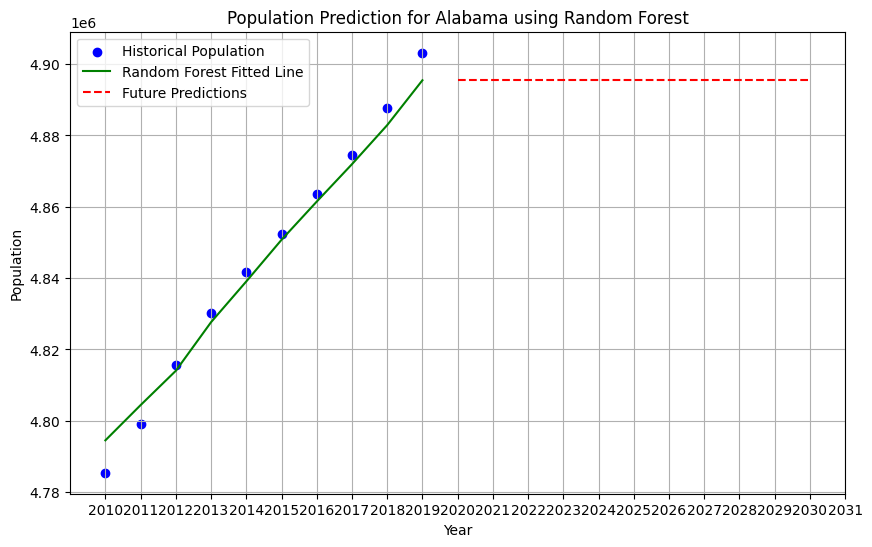

Accuracy Metrics for Decision Tree:
  Mean Absolute Error (MAE): 0.00
  Mean Squared Error (MSE): 0.00
  R-squared (R²): 1.00
Enter the year for prediction (e.g., 2024): 2026
Enter estimated growth rate (e.g., 0.02 for 2%): 0.02
The predicted population for Alabama in 2026 using Decision Tree is: 4903185


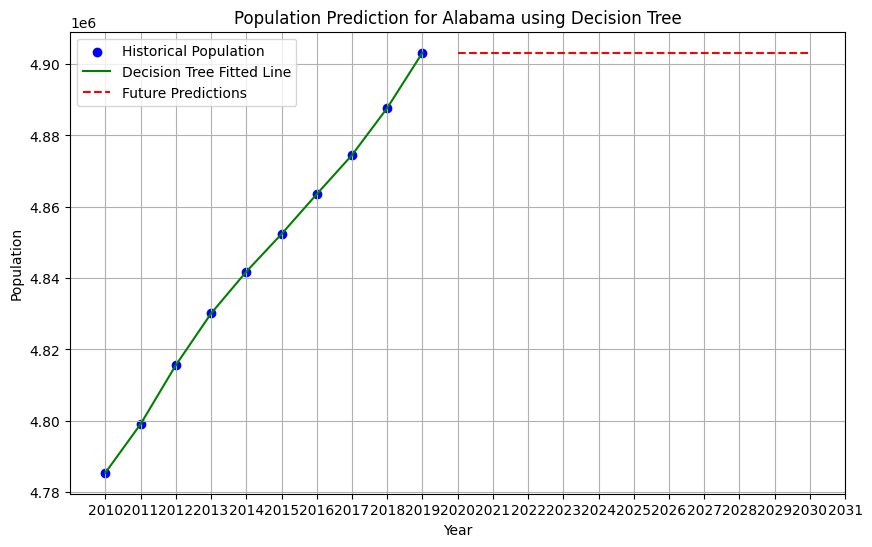

The best model for predicting the population of Alabama is: Decision Tree with R² score: 1.00


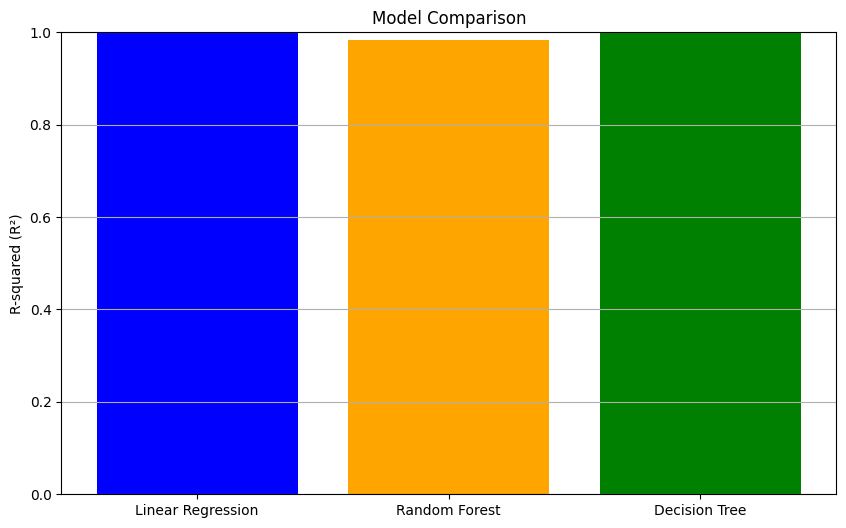

Do you want to make another prediction? (yes/no): no
Thank you for using the population prediction tool!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the dataset from the CSV file
df = pd.read_csv('/content/Population (1).csv')

# Clean the population data: Remove commas and convert to integers
for year in range(2010, 2020):
    df[str(year)] = df[str(year)].str.replace(',', '').astype(int)

# Prepare the data for the model
years = np.array(range(2010, 2020)).reshape(-1, 1)  # Years as feature

while True:
    # User input for prediction
    user_state = input("Enter the state name for prediction (e.g., Alabama): ")

    if user_state in df['Area_Name'].values:
        # Get the population data for the specified state
        populations = df[df['Area_Name'] == user_state].iloc[:, 3:].values.flatten()  # Population data

        # Calculate the growth rate for the specific state
        growth_rate = np.diff(populations) / populations[:-1]  # Year-on-year growth rate
        growth_rate = np.insert(growth_rate, 0, 0)  # Insert 0 for the first year (no growth rate)

        # Create and train models
        models = {
            'Linear Regression': LinearRegression(),
            'Random Forest': RandomForestRegressor(n_estimators=100),
            'Decision Tree': DecisionTreeRegressor()
        }

        best_model_name = None
        best_r2 = -np.inf  # Initialize best R² score
        best_predictions = None
        results = {}

        for model_name, model in models.items():
            # Combine years and growth rate for training
            X = np.hstack((years, growth_rate.reshape(-1, 1)))
            model.fit(X, populations)

            # Predict for the training years to calculate accuracy
            predictions = model.predict(X)

            # Calculate accuracy metrics
            mae = mean_absolute_error(populations, predictions)
            mse = mean_squared_error(populations, predictions)
            r2 = r2_score(populations, predictions)

            # Store results for comparison
            results[model_name] = r2

            # Display accuracy metrics
            print(f"Accuracy Metrics for {model_name}:")
            print(f"  Mean Absolute Error (MAE): {mae:.2f}")
            print(f"  Mean Squared Error (MSE): {mse:.2f}")
            print(f"  R-squared (R²): {r2:.2f}")

            # Check for the best model based on R² score
            if r2 > best_r2:
                best_r2 = r2
                best_model_name = model_name
                best_predictions = predictions

            # Predict for any future year
            user_year = int(input("Enter the year for prediction (e.g., 2024): "))
            user_growth_rate = float(input("Enter estimated growth rate (e.g., 0.02 for 2%): "))  # User input for growth rate
            user_prediction = model.predict(np.array([[user_year, user_growth_rate]]))
            print(f"The predicted population for {user_state} in {user_year} using {model_name} is: {int(user_prediction[0])}")

            # Plotting the results
            plt.figure(figsize=(10, 6))
            plt.scatter(years, populations, color='blue', label='Historical Population')
            plt.plot(years, predictions, color='green', label=f'{model_name} Fitted Line')

            # Plot future predictions
            future_years = np.array(range(2020, 2031)).reshape(-1, 1)
            future_growth_rate = np.full((future_years.shape[0], 1), user_growth_rate)  # Use user input for growth rate
            plt.plot(future_years, model.predict(np.hstack((future_years, future_growth_rate))), color='red', linestyle='dashed', label='Future Predictions')

            plt.title(f'Population Prediction for {user_state} using {model_name}')
            plt.xlabel('Year')
            plt.ylabel('Population')
            plt.xticks(np.arange(2010, 2032, 1))
            plt.legend()
            plt.grid()
            plt.show()

        # Display the best model based on R² score
        print(f"The best model for predicting the population of {user_state} is: {best_model_name} with R² score: {best_r2:.2f}")

        # Plotting the comparison of models
        plt.figure(figsize=(10, 6))
        plt.bar(results.keys(), results.values(), color=['blue', 'orange', 'green'])
        plt.ylabel('R-squared (R²)')
        plt.title('Model Comparison')
        plt.ylim(0, 1)  # R² values range from 0 to 1
        plt.grid(axis='y')
        plt.show()

    else:
        print("State not found in the dataset.")

    # Ask user if they want to continue
    continue_prompt = input("Do you want to make another prediction? (yes/no): ").strip().lower()
    if continue_prompt != 'yes':
        print("Thank you for using the population prediction tool!")
        break